In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/product-sentiment-classification/Participants_Data/Sample Submission.csv
/kaggle/input/product-sentiment-classification/Participants_Data/Train.csv
/kaggle/input/product-sentiment-classification/Participants_Data/Test.csv


#  Introduction to Product Sentiment Classification

Product sentiment classification is a subfield of natural language processing (NLP) focused on determining the sentiment expressed in user-generated content about products, such as reviews, ratings, and comments. This process involves categorizing text as positive, negative, or neutral, enabling businesses to gauge customer opinions, improve products, and enhance marketing strategies.

**Importance of Sentiment Analysis**
Customer Insights: Understanding how consumers feel about products helps companies identify strengths and weaknesses.
Reputation Management: By monitoring sentiment, brands can respond to negative feedback proactively, improving their reputation.
Market Trends: Analyzing sentiment over time can reveal shifts in consumer preferences and emerging market trends.
Product Development: Insights from sentiment analysis can guide product improvements and innovation.

# import


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read

In [3]:
train_data = pd.read_csv("/kaggle/input/product-sentiment-classification/Participants_Data/Train.csv")
test_data = pd.read_csv("/kaggle/input/product-sentiment-classification/Participants_Data/Test.csv")
print("Training Data -",train_data.shape)
print("Testing Data -",test_data.shape)

Training Data - (6364, 4)
Testing Data - (2728, 3)


In [4]:
train_data.head()

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
1,6254,RT @mention Line for iPad 2 is longer today th...,9,2
2,8212,Crazy that Apple is opening a temporary store ...,9,2
3,4422,The lesson from Google One Pass: In this digit...,9,2
4,5526,RT @mention At the panel: &quot;Your mom has a...,9,2


In [5]:
train_data['Product_Type'].value_counts()

Product_Type
9    4070
6     665
2     465
7     327
3     300
5     213
8     194
1      59
0      52
4      19
Name: count, dtype: int64

In [6]:
train_data.drop(train_data[train_data.Product_Type=='0'].index, inplace=True)
train_data['Product_Type'].value_counts()

Product_Type
9    4070
6     665
2     465
7     327
3     300
5     213
8     194
1      59
0      52
4      19
Name: count, dtype: int64

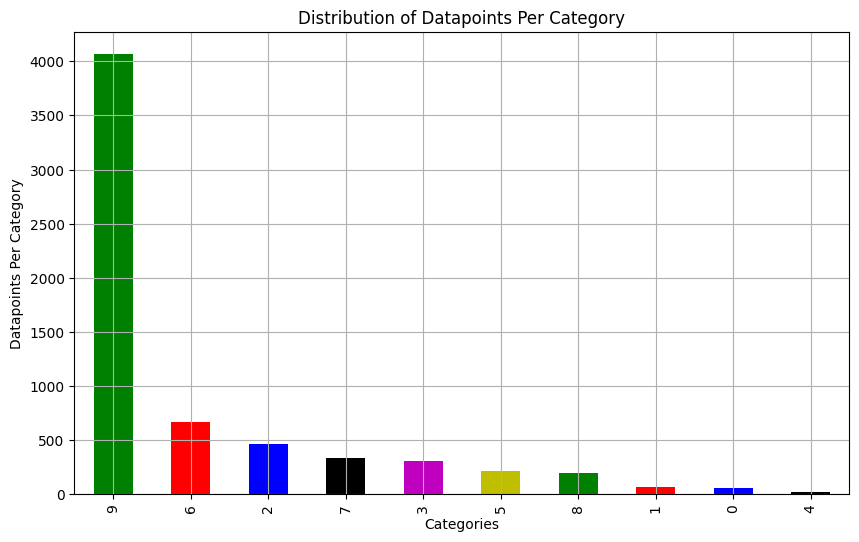

In [7]:
category_dist = train_data['Product_Type'].value_counts()

plt.figure(figsize=(10,6))
my_colors = ['g', 'r', 'b', 'k', 'm', 'y']
category_dist.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Categories")
plt.ylabel("Datapoints Per Category")
plt.title("Distribution of Datapoints Per Category")
plt.show()

In [8]:
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
import nltk
import re

#loading_the_stop_words_from_nltk_library_
stop_words = set(stopwords.words('english'))

def txt_preprocessing(total_text, index, column, df):
    if type(total_text) is not int:
        string = ""
        
        #replace_every_special_char_with_space
        total_text = re.sub('[^a-zA-Z0-9\n]', ' ', total_text)
        
        #replace_multiple_spaces_with_single_space
        total_text = re.sub('\s+',' ', total_text)
        
        #converting_all_the_chars_into_lower_case
        total_text = total_text.lower()  
        for word in total_text.split():
        #if_the_word_is_a_not_a_stop_word_then_retain_that_word_from_the_data
            if not word in stop_words:
                string += word + " "
        
        df[column][index] = string

In [9]:
for index, row in train_data.iterrows():
    if type(row['Product_Description']) is str:
        txt_preprocessing(row['Product_Description'], index, 'Product_Description', train_data)
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :",Product_Description)

train_data.head()

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,web designer guide ios android apps today ment...,9,2
1,6254,rt mention line ipad 2 longer today yesterday ...,9,2
2,8212,crazy apple opening temporary store austin tom...,9,2
3,4422,lesson google one pass digital environment use...,9,2
4,5526,rt mention panel quot mom ipad designing boome...,9,2


In [10]:
for index, row in train_data.iterrows():
    if type(row['Product_Description']) is str:
        txt_preprocessing(row['Product_Description'], index, 'Product_Description', train_data)
    else:
        print("THERE IS NO TEXT DESCRIPTION FOR ID :",Product_Description)

train_data.head()

,Text_ID,Product_Description,Product_Type,Sentiment
0,3057,web designer guide ios android apps today ment...,9,2
1,6254,rt mention line ipad 2 longer today yesterday ...,9,2
2,8212,crazy apple opening temporary store austin tom...,9,2
3,4422,lesson google one pass digital environment use...,9,2
4,5526,rt mention panel quot mom ipad designing boome...,9,2


In [11]:
from sklearn.model_selection import train_test_split
X_train = train_data['Product_Description']
y_train = train_data['Product_Type']

X_test = test_data['Product_Description']

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=0)
print("NUMBER OF DATA POINTS IN TRAIN DATA :", X_train.shape[0])
print("NUMBER OF DATA POINTS IN CROSS VALIDATION DATA :", X_cv.shape[0])

NUMBER OF DATA POINTS IN TRAIN DATA : 5091
NUMBER OF DATA POINTS IN CROSS VALIDATION DATA : 1273


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
​
text_vectorizer = CountVectorizer(min_df=3)
train_text_ohe = text_vectorizer.fit_transform(X_train)
​
#getting all the feature names (words)
train_text_features = text_vectorizer.get_feature_names()
​
#train_text_ohe.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_ohe.sum(axis=0).A1
​
#zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))
​
print("Total Number of Unique Words in Train Data :",len(train_text_features))

SyntaxError: invalid non-printable character U+200B (3041626765.py, line 2)